In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
from folium import Choropleth
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import files
upload = files.upload()

Saving GlobalWeatherRepository.csv to GlobalWeatherRepository.csv


In [3]:
df  = pd.read_csv('GlobalWeatherRepository.csv')

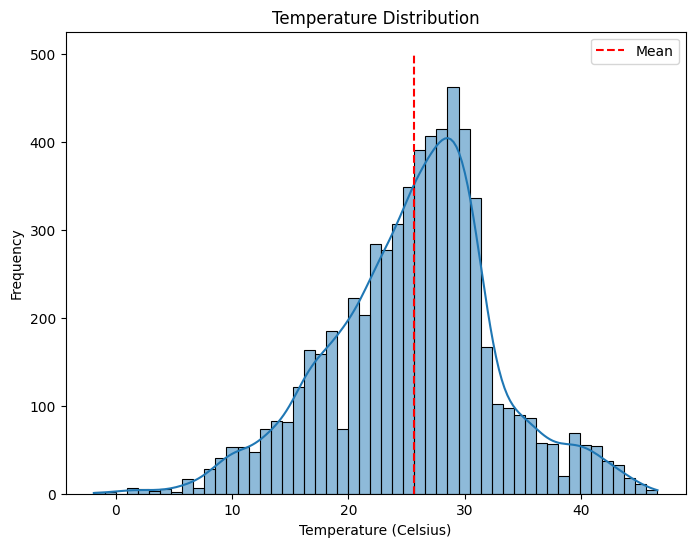

In [5]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='temperature_celsius', kde=True)
plt.vlines(df['temperature_celsius'].mean(), ymin=0, ymax=500, color='r', linestyle='--', label = 'Mean')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

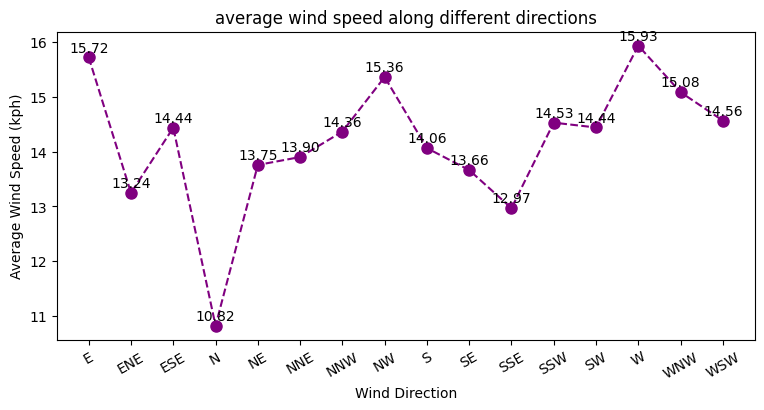

In [6]:
avg_wind = df.groupby('wind_direction')['wind_kph'].mean()
plt.figure(figsize=(9,4))
plt.plot(avg_wind.index, avg_wind.values, color='purple', marker = 'o', markersize=8, linestyle = '--')
plt.title('average wind speed along different directions')
plt.xlabel('Wind Direction')
plt.ylabel('Average Wind Speed (kph)')
plt.xticks(rotation=30)
for i, txt in enumerate(avg_wind.values):
    plt.annotate(f'{txt:.2f}', (avg_wind.index[i], txt), textcoords="offset points", xytext=(0, 4), ha="center")
plt.show()

In [8]:
from folium.features import DivIcon
avg_temp = df.groupby('country')['temperature_celsius'].mean().reset_index()
avg_temp.columns = ['Country', 'Average Temperature']
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(avg_temp, left_on='name', right_on='Country', how='left')
map = folium.Map(location=[0,0], zoom_start=2)
Choropleth(geo_data=merged,
           data=avg_temp,
           columns=['Country', 'Average Temperature'],
           key_on='feature.properties.name',
          fill_color='YlOrRd',
           fill_opacity=0.7,
           line_opacity=0.2,
           legend_name='Average Temperature in celsius').add_to(map)
for idx, row in merged.iterrows():
  if row['geometry'].geom_type in ['Polygon', 'MultiPolygon']:
        centroid = row['geometry'].centroid
        latitude = centroid.y
        longitude = centroid.x
        folium.map.Marker(
            location=[latitude, longitude],
            icon=DivIcon(
                icon_size=(30, 28),
                icon_anchor=(0, 0),
                html=f'<div style="font-size: 5pt; color : black">{row["Average Temperature"]:.2f} °C</div>',
            )
        ).add_to(map)
map

<ipython-input-8-0fe04d643b6c>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [13]:
avg_humidity = df.groupby(df['country'])['humidity'].mean().reset_index()
sc_plot = px.scatter(avg_humidity, x='country', y='humidity', size='humidity', color = 'country', title = 'Average Humidity across Countries')
sc_plot.show()

In [15]:
temp_windspeed = px.scatter_3d(df, z='pressure_mb', x='temperature_celsius', y='wind_kph', color = 'country', title='Proximity of cyclones')
temp_windspeed.show()

<function matplotlib.pyplot.show(close=None, block=None)>

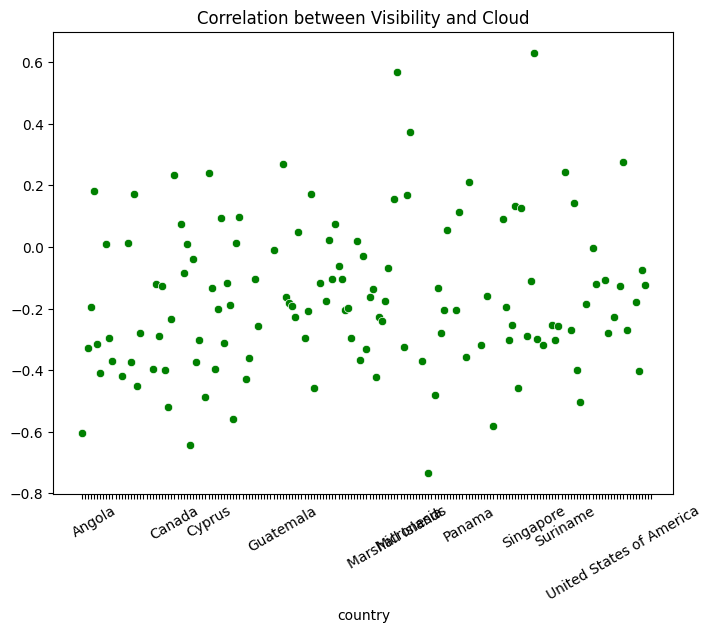

In [23]:
vis_cld = df.groupby('country')[['visibility_km', 'cloud']].corr().unstack().iloc[:,1]
plt.figure(figsize = (8,6))
sns.scatterplot(x = vis_cld.index, y = vis_cld.values, marker = 'o', color = 'green')
top_5 = vis_cld.sort_values(ascending = False).head(10).index
labels = [x if x in top_5 else '' for x in vis_cld.index]
plt.xticks(range(len(labels)), labels, rotation = 30)
plt.title('Correlation between Visibility and Cloud')
plt.show